<a href="https://colab.research.google.com/github/abhishek-kr27/Wine-Quality/blob/main/Credit_Card_Fraud_Detectin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the library

In [1]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib
import sklearn

print('python : {}'. format(sys.version))
print('Numpy : {}'. format(np.__version__))
print('Pandas : {}'. format(pd.__version__))
print('Seaborn: {}'. format(sns.__version__))
print('Sklearn : {}'. format(sklearn.__version__))
print('Matplotlib : {}'. format(matplotlib.__version__))

python : 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Numpy : 1.26.4
Pandas : 2.2.2
Seaborn: 0.13.2
Sklearn : 1.5.2
Matplotlib : 3.7.1


**Data Loading and Overview**

In [2]:
data=pd.read_csv("/content/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
pd.options.display.max_columns=None #For showing all colums

In [6]:
data.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
127977,78548.0,0.980063,-0.185255,0.912179,1.407879,-0.291427,1.093446,-0.495720,0.423344,0.529922,-0.157756,1.161634,1.705834,0.172431,-0.257069,-1.200674,-0.941788,0.446679,-0.905804,-0.344102,-0.135787,0.016968,0.385282,-0.082201,-0.249045,0.515495,-0.249933,0.084212,0.014707,35.00,0
174618,121989.0,2.303377,-1.346218,-1.185867,-1.629185,-0.957094,-0.496456,-1.006030,-0.218297,-1.268406,1.560462,-1.247373,-0.781863,0.735677,-0.469798,-0.184141,-0.525900,0.375689,-0.049388,-0.011547,-0.359784,-0.182722,-0.053420,0.211078,0.463239,-0.104711,-0.180428,0.002446,-0.044216,30.00,0
87062,61524.0,-0.277013,0.038010,2.343337,-0.913644,-1.341221,-0.668088,-0.156581,-0.064930,-1.036008,0.059916,-0.302974,0.438921,1.344699,-0.729592,0.084252,-1.553353,0.193324,1.064028,-0.845892,-0.317845,-0.121091,0.269236,-0.048118,0.998132,-0.293007,1.086702,0.035873,0.064942,25.68,0


Now above data shows all for the columns of dataframe.

In [7]:
data.shape

(284807, 31)

In [8]:
print("Number of colums:{}".format(data.shape[1]))
print("Number of rows:{}".format(data.shape[0]))

Number of colums:31
Number of rows:284807


In [9]:
## Some Info About The Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
print("Number of colums:{}".format(data.shape[1]))
print("Number of rows:{}".format(data.shape[0]))

Number of colums:31
Number of rows:284807


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc=StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
data=data.drop(['Time'],axis=1) #delete the time column from the data

In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
data.duplicated().any()

True

In [18]:
data.duplicated().sum()

9144

In [19]:
data=data.drop_duplicates() #remove the duplicated value i.e 9144

In [20]:
data.shape

(275663, 30)

In [21]:
data['Class'].value_counts()

,count
Class,
0,275190
1,473


In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

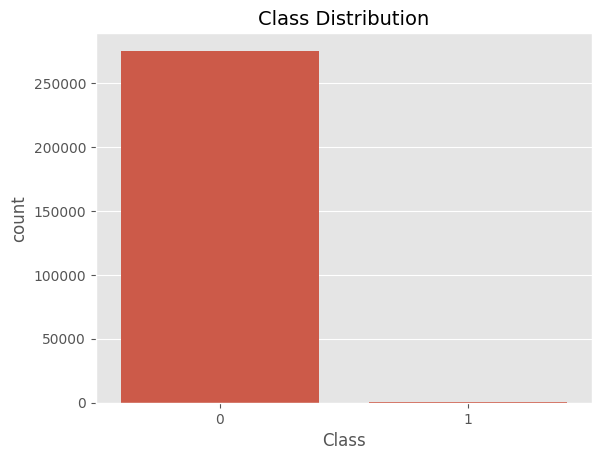

In [23]:
sns.countplot(x='Class',data=data)
plt.title('Class Distribution',fontsize=14)
plt.show()

Clearly we see, it is highly unbalanced dataset.

In [24]:
X=data.drop(['Class'],axis=1)
Y=data['Class']

In [25]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,-0.007174,-0.005347,0.000539,0.000681,-0.010315,-0.004319,0.000479,0.003874,0.000511,0.003407,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,0.008911
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,1.020571,0.998661,0.999660,0.952571,0.917772,0.880320,0.844821,0.841638,0.820520,0.779950,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,1.012371
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,-0.772693,-0.413717,-0.654360,-0.425932,-0.596079,-0.477642,-0.482600,-0.498396,-0.464409,-0.212027,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,-0.328041
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,-0.039469,0.133349,-0.011557,0.049552,0.036145,0.061670,-0.063489,0.001392,0.001119,-0.058053,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,-0.258315
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,0.734969,0.614670,0.668570,0.492169,0.638997,0.524709,0.401407,0.507708,0.465782,0.139803,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,-0.033742
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243


In [26]:
Y.describe()

,Class
count,275663.000000
mean,0.001716
std,0.041388
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# **Model Building**

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [28]:
#Import Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

In [29]:
#Import RandomForest and DecisionTree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


=======LogisticRegression=======

Accuracy Score: 0.9992563437505668

Precision Score: 0.890625

Recall Score: 0.6263736263736264

F1 Score: 0.7354838709677419


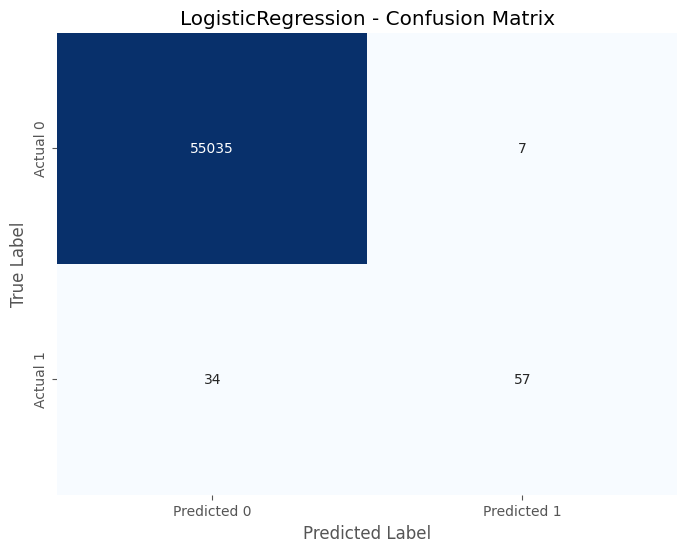


=======DecisionTreeClassifier=======

Accuracy Score: 0.9989661364337148

Precision Score: 0.673469387755102

Recall Score: 0.7252747252747253

F1 Score: 0.6984126984126984


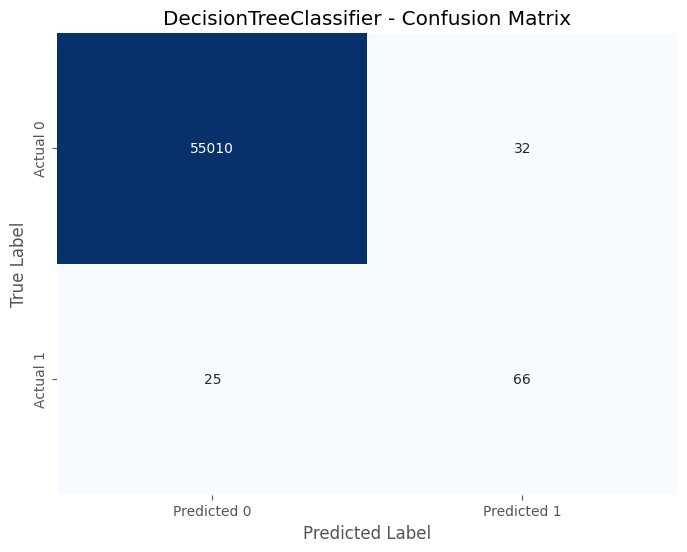


=======RandomForestClassifier=======

Accuracy Score: 0.9994558612809026

Precision Score: 0.9178082191780822

Recall Score: 0.7362637362637363

F1 Score: 0.8170731707317073


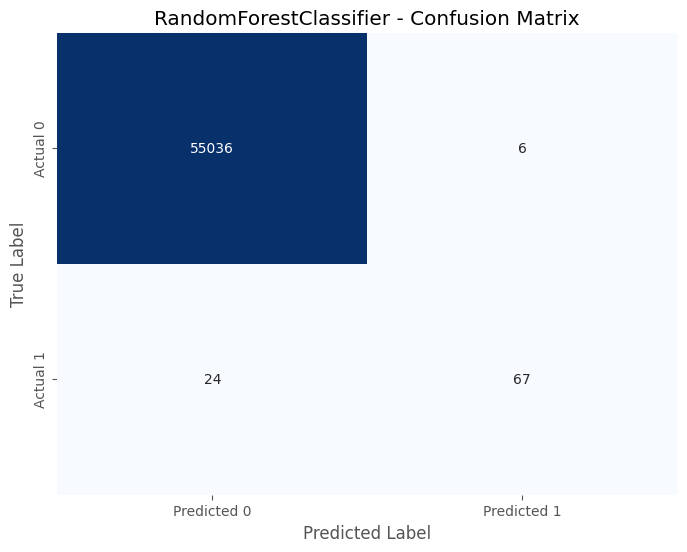

In [34]:
classifier={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
     'RandomForestClassifier':RandomForestClassifier()
}

for name ,clf in classifier.items():
  print(f"\n======={name}=======")
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  print(f"\nAccuracy Score: {accuracy_score(Y_test,Y_pred)}")
  print(f"\nPrecision Score: {precision_score(Y_test,Y_pred)}")
  print(f"\nRecall Score: {recall_score(Y_test,Y_pred)}")
  print(f"\nF1 Score: {f1_score(Y_test,Y_pred)}")


  # Plot confusion matrix
  conf_matrix = confusion_matrix(Y_test, Y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'{name} - Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# ***`Undersampling algo.`***

In [36]:
valid=data[data['Class']==0]
fraud=data[data['Class']==1]

In [38]:
valid.shape

(275190, 30)

In [39]:
fraud.shape

(473, 30)

In [40]:
valid_sample=valid.sample(n=473)

In [41]:
print(valid_sample.shape)
print(fraud.shape)

(473, 30)
(473, 30)


**Now the undersampling is done we have to now building a model as we done before.**

In [42]:
#concat
new_data=pd.concat([valid_sample,fraud],ignore_index=True)

In [43]:
new_data.shape

(946, 30)

In [45]:
new_data.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183,1.195341,0.720147,-0.312330,1.228753,0.199704,-0.903017,0.251587,-0.133808,-0.445296,-0.531107,1.927657,0.905329,0.482630,-1.264444,0.320415,0.764124,0.606949,1.011876,-0.339211,-0.046725,-0.008998,0.041279,-0.143864,0.213118,0.682556,-0.346790,0.035521,0.048642,-0.349231,0
558,-2.830984,0.885657,1.199930,2.861292,0.321669,0.289966,1.767760,-2.451050,0.069736,3.245086,0.675288,-0.677096,-0.222741,-0.913787,1.603332,-1.024502,0.022045,-0.940685,0.484759,-1.016923,0.546589,0.334971,0.172106,0.623590,-0.527114,-0.079215,-2.532445,0.311177,0.065810,1
168,-0.738747,0.171818,0.351912,-0.642273,0.556541,1.384343,-0.412142,0.778868,0.896676,-0.345245,-0.405989,0.479175,0.080374,-0.256309,0.942503,-0.898473,0.578855,-1.780006,-2.023597,-0.298232,0.357005,1.507150,0.279434,-1.405293,-0.990713,0.589165,-0.157540,-0.164239,-0.325323,0
346,-1.208367,0.820700,1.965662,-0.236173,-0.028537,0.791668,-0.199087,0.583047,0.083974,-0.348870,-0.159924,0.748496,0.675760,-0.453671,-0.607833,0.558638,-0.762676,0.752745,0.918492,0.155457,-0.105456,-0.033879,-0.321406,-0.781093,0.380619,0.384704,-0.114568,-0.182143,-0.344554,0
810,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,-0.193244,1.783739,0.606911,-2.854275,2.379473,1.268147,-0.283619,-0.482192,0.811005,-0.357911,0.752761,-0.038314,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,2.185955,1
503,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,-1.498468,-4.594952,5.275506,-11.349029,0.374549,-8.138695,0.548571,-6.653594,-10.246755,-4.191066,0.991486,-0.158971,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,-0.353229,1
449,-6.272126,-1.439344,-0.213135,-0.644360,5.348902,-3.107714,-2.026652,-0.546255,2.404942,3.212474,1.161926,0.199722,-0.764665,-1.916547,-0.242888,0.766894,-0.412354,-0.219677,0.107595,-2.212261,-1.910299,-1.482650,-3.299425,0.497272,0.578255,0.331865,2.497735,-0.453133,-0.308131,0
321,-0.220604,0.868241,1.411442,2.429955,1.591444,2.348357,0.571692,0.299066,-0.751502,1.353512,0.206597,-0.444660,-1.454879,-0.255432,-1.236885,0.336840,-0.608283,-1.211072,-1.967548,-0.296300,-0.330431,-0.702575,0.159122,-1.777951,-1.094470,-0.551125,-0.488653,-0.404802,-0.331960,0
193,2.075736,-0.171756,-1.601410,0.147063,0.218652,-0.781518,0.155933,-0.254262,0.291002,0.305358,0.442532,0.756210,-0.085044,0.499684,-0.721228,-0.057553,-0.610026,0.288817,0.346105,-0.201947,0.357481,1.243856,-0.166618,-0.288081,0.363525,1.014035,-0.099034,-0.093702,-0.338636,0
82,-0.124390,-0.600151,1.307661,-1.199529,-1.266278,0.939172,-0.441958,-0.336395,1.465289,-1.359331,1.389540,0.693266,-1.670768,0.430000,1.179703,-0.731676,0.276299,0.205219,-0.083659,-0.035515,1.062757,0.514359,0.136836,-0.315724,1.048866,-0.411370,0.137950,0.140031,0.275470,0


In [46]:
new_data['Class'].value_counts()

,count
Class,
0,473
1,473


In [47]:
X=new_data.drop(['Class'],axis=1)
Y=new_data['Class']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


=======LogisticRegression=======

Accuracy Score: 0.9368421052631579

Precision Score: 0.96875

Recall Score: 0.9117647058823529

F1 Score: 0.9393939393939394


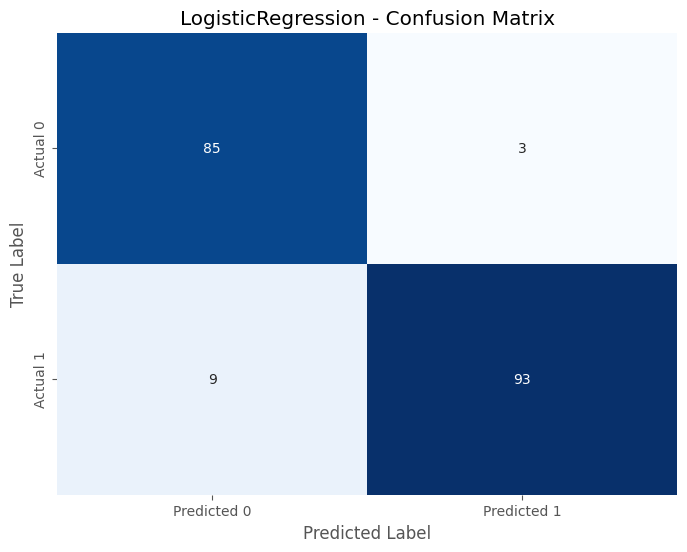


=======DecisionTreeClassifier=======

Accuracy Score: 0.8789473684210526

Precision Score: 0.8691588785046729

Recall Score: 0.9117647058823529

F1 Score: 0.8899521531100478


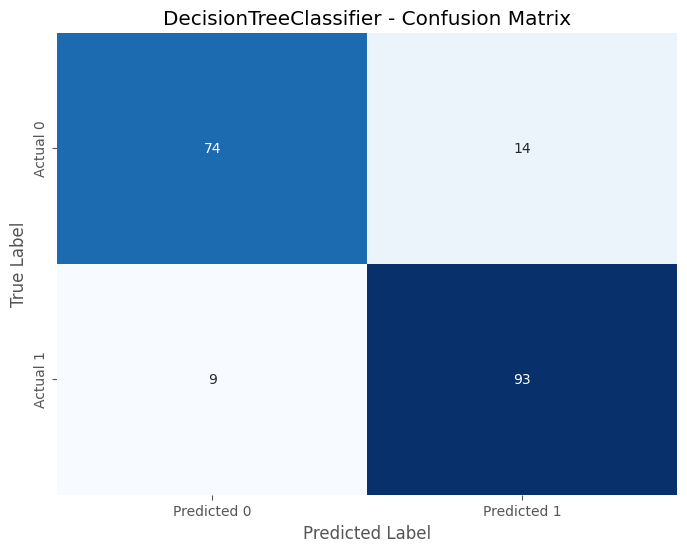


=======RandomForestClassifier=======

Accuracy Score: 0.9315789473684211

Precision Score: 0.968421052631579

Recall Score: 0.9019607843137255

F1 Score: 0.934010152284264


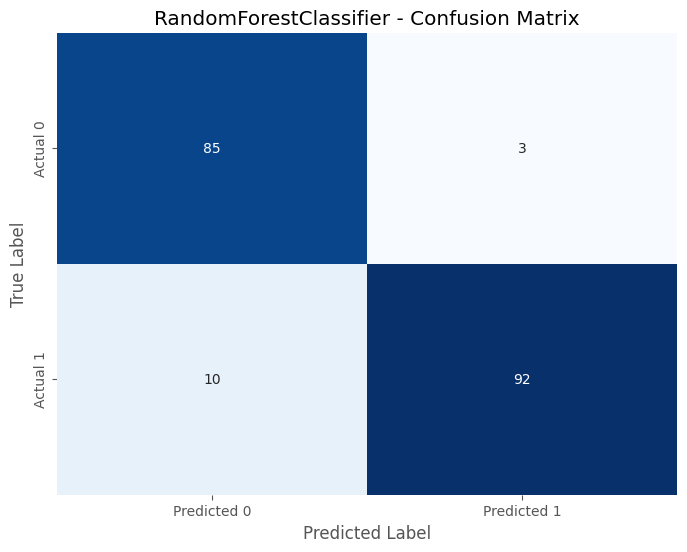

In [49]:

classifier={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
     'RandomForestClassifier':RandomForestClassifier()
}

for name ,clf in classifier.items():
  print(f"\n======={name}=======")
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  print(f"\nAccuracy Score: {accuracy_score(Y_test,Y_pred)}")
  print(f"\nPrecision Score: {precision_score(Y_test,Y_pred)}")
  print(f"\nRecall Score: {recall_score(Y_test,Y_pred)}")
  print(f"\nF1 Score: {f1_score(Y_test,Y_pred)}")


  # Plot confusion matrix
  conf_matrix = confusion_matrix(Y_test, Y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'{name} - Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# ***`Oversampling algo.`***

In [50]:
X=data.drop(['Class'],axis=1)
Y=data['Class']

In [51]:
print(X.shape)
print(Y.shape)

(275663, 29)
(275663,)


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X_res,Y_res=SMOTE().fit_resample(X,Y)

In [54]:
Y_res.value_counts()

,count
Class,
0,275190
1,275190


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,random_state=42)


=======LogisticRegression=======

Accuracy Score: 0.9454467822231912

Precision Score: 0.9729171492548838

Recall Score: 0.9163318364452848

F1 Score: 0.9437770932616776


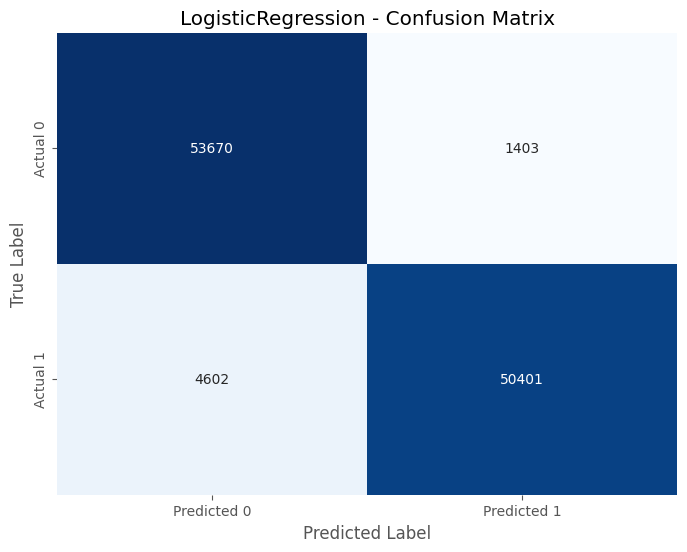


=======DecisionTreeClassifier=======

Accuracy Score: 0.998210327410153

Precision Score: 0.9974223997095661

Recall Score: 0.9990000545424795

F1 Score: 0.9982106037622737


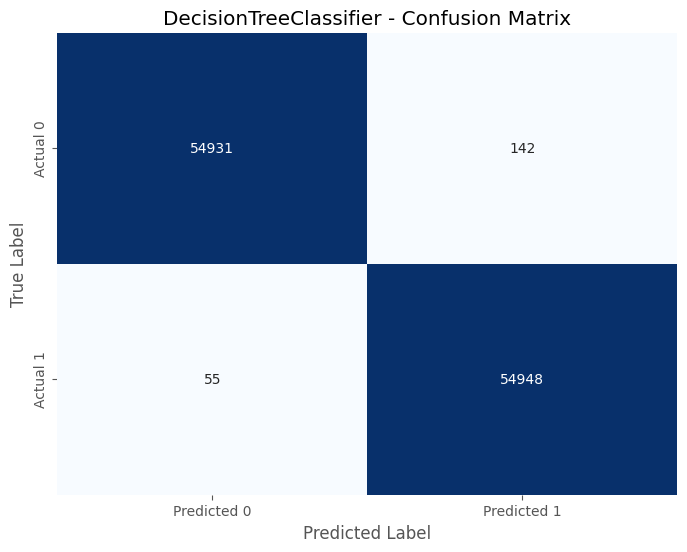


=======RandomForestClassifier=======

Accuracy Score: 0.9999273229405138

Precision Score: 0.9998545745396376

Recall Score: 1.0

F1 Score: 0.9999272819822932


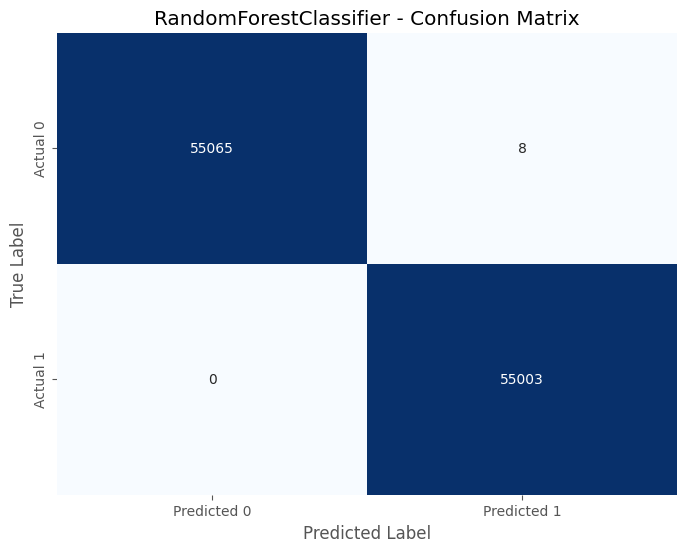

In [60]:

classifier={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
     'RandomForestClassifier':RandomForestClassifier()
}

for name ,clf in classifier.items():
  print(f"\n======={name}=======")
  clf.fit(X_train,Y_train)
  Y_pred=clf.predict(X_test)
  print(f"\nAccuracy Score: {accuracy_score(Y_test,Y_pred)}")
  print(f"\nPrecision Score: {precision_score(Y_test,Y_pred)}")
  print(f"\nRecall Score: {recall_score(Y_test,Y_pred)}")
  print(f"\nF1 Score: {f1_score(Y_test,Y_pred)}")


  # Plot confusion matrix
  conf_matrix = confusion_matrix(Y_test, Y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'{name} - Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

In [61]:
rfc= RandomForestClassifier()
rfc.fit(X_res, Y_res)

RandomForestClassifier()

# **PREDICTIONS**

In [62]:
import joblib

In [63]:
joblib.dump(rfc,"Fraud_Dectecion_Model.pkl")

['Fraud_Dectecion_Model.pkl']

In [64]:
model=joblib.load("Fraud_Dectecion_Model.pkl")

In [76]:
prediction=model.predict([[-3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513, -1.064822523, 0.325574266, -0.067793653, -0.270952836, -0.838586565, -0.414575448, -0.50314086, 0.676501545, -1.692028933, 2.000634839, 0.666779696, 0.599717414, 1.725321007, 0.28334483, 2.102338793, 0.661695925, 0.435477209, 1.375965743, -0.293803153, 0.279798032, -0.145361715, -0.252773123, 0.035764225, 529
]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [77]:
if prediction[0] == 0:
    print("Normal Transcation")
else:
    print("Fraud Transcation")

Fraud Transcation
